<h1 style="color:#000000; font-family:'Times New Roman'; text-align:center;">  Προβλέψεις διάχυσης σε ογκώδη και περιορισμένα ιοντικά υγρά μέσω της μηχανικής μάθησης με χρήση απλών περιγραφικών χαρακτηριστικών. </h1>

<span style="color:#000000; font-family:Times New Roman; font-size:15px;">
<h3 style="text-align:center; font-size:22px;"> <i> Περίληψη του σχετικού άρθρου </i> </h3> 
<p style="text-align: justify;">Η μελέτη παρουσιάζει μοντέλα μηχανικής μάθησης (ML) που προβλέπουν με ακρίβεια και ταχύτητα τη διάχυση και την ιοντική αγωγιμότητα ιοντικών υγρών, τόσο σε ογκώδη μορφή όσο και όταν βρίσκονται περιορισμένα μέσα σε στενούς πόρους γραφίτη. Τα μοντέλα αυτά εκπαιδεύτηκαν με δεδομένα από προσομοιώσεις μοριακής δυναμικής για 29 διαφορετικά ιοντικά υγρά σε θερμοκραασίες 350-500K. Το σημαντικό είναι ότι οι προβλέψεις βασίζονται σε απλά φυσικά χαρακτηριστικά των ιόντων, όπως το μοριακό βάρος και η επιφάνεια τους, ή ακόμη πιο απλά, σε πληροφορίες που εξάγονται μόνο από τους SMILES (simplified molecular-input line-entry system) κώδικες των μορίων. Αυτό κάνει το μοντέλο πολύ γρήγορο, φθηνό υπολογιστικά και χρήσιμο για μηχανικούς και επιστήμονες που σχεδιάζουν εφαρμογές με ιοντικά υγρά. 
</p>

</span>

<span style="color:#000000; font-family:Times New Roman; font-size:15px;"> 
<h3 style= "text-align:center; font-size:22px;"> <i> Περιγραφή της άσκησης </i></h3>
 
<ul style="text-align: justify;">
    <li>Τα ιοντικά ρευστά διακρίνονται από <b>θετικά (κατιόντα)</b> και <b>αρνητικά (ανιόντα) φορτία</b>, τα οποία σε μεγάλο βαθμό καθορίζουν τις ιδιότητες τους. 'Ετσι, σε κάθε περίπτωση θα μελετηθούν οι παράμετροι που επηρεάζουν τον υπολογισμό του συντελεστή διάχυσης.</li> 
<li>Αυτοί οι παράμετροι είναι <b>η πυκνότητα (ρ)</b>, <b>η θερμοκραία (Τ)</b>, <b>το μοριακό βάρος (W)</b>, <b>η παράμετρος slope</b> (a για ανιόντα που ζητείται \(D_a\) και c για κατιόντα που ζητείεται \(D_c\)) κλπ. Αυτά τα δεδομένα θα χρησιμοποιηθούν ως μεταβλητές εισόδου, ξεκινώντας πρώτα μόνο με την πυκνότητα και την θερμοκρασία και έπειτα προσθέτοντας στην κάθε ίδια διαδικασία και την επόμενη παράμετρο.</li>
<li>Λαμβάνοντας υπόψην τα παραπάνω δεδομένα, θα υπολιγστούν (προβλεφθούν) οι συντελεστές διάχυσης ανιόντων/κατιόντων μέσω διάφορων μεθόδων μηχανικής μάθησης, όπως <b>Random Forest, Extra Tress, Gradient Boost</b> και <b>Neural Networks.</b></li>
<li> Στην συγκεκριμένη ανάλυση θα επικεντρωθούμε στα ανιόντα και θα εξετάσουμε κάθε μέθοδο.Στο τέλος, θα συγκρίνουμε και θα συμπεράνουμε τα διάφορα αποτελέσματα. </li>

</ul>
</p>
</span>

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPRegressor
from scipy.stats import linregress
!pip install yellowbrick
from yellowbrick.model_selection import CVScores

# Install package yellowbrick
# go to Anaconda shell and type
# conda install -c districtdatalabs yellowbrick


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
df=pd.read_excel('Ionic1.xlsx') #read data from excel
print(df)
df.columns


     IL    rho      T     Dc      Da  logc  loga      MWc     Mwa
0     1  1.672  349.9   29.1    21.8  0.93  0.73   68.077  295.24
1     1  1.640  379.8   77.5    52.1  0.91  0.94   68.077  295.24
2     1  1.610  409.8  150.6   103.7  1.01  0.96   68.077  295.24
3     1  1.578  439.8  266.2   183.8  1.00  0.91   68.077  295.24
4     1  1.548  469.8  410.2   283.5  0.98  0.93   68.077  295.24
..   ..    ...    ...    ...     ...   ...   ...      ...     ...
161  29  0.987  379.8  123.7   163.8  0.96  0.90  130.190  109.13
162  29  0.967  409.8  244.7   328.1  0.96  0.99  130.190  109.13
163  29  0.949  439.8  392.0   505.0  0.96  0.98  130.190  109.13
164  29  0.931  469.8  580.2   780.8  0.97  1.03  130.190  109.13
165  29  0.912  499.8  796.8  1097.5  0.99  1.02  130.190  109.13

[166 rows x 9 columns]


Index(['IL', 'rho', 'T', 'Dc', 'Da', 'logc', 'loga', 'MWc', 'Mwa'], dtype='object')


<h3 style="color:#000000; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> Ανάλυση του κώδικα </i> </h3>
<span style="color:#000000; font-family:Times New Roman; font-size:15px; text-align: justify;"> 
<ol style="text-align: justify;"> 
    <li> Αφού εισάγουμε τις απαραίτητες βιβλιοθήκες και διαβάσουμε το αρχείο του excel, τότε θα φτιάξουμε μια λίστα των στηλών της <b>πυκνότητας (ρ)</b> και της <b>θερμοκρασίας (Τ)</b> ως τις μεταβλητές εισόδου <i>Χ</i> καθώς η μεταβλητή εξόδου <i>Υ</i> θα είναι ο συντελεστής διάχυσης των ανιότων \(D_a\). </li>
    <li> Στο ίδιο κελί κώδικα θα προσθέσουμε σε ξεχωριστές λίστες <i>Χ2</i> και <i>Χ3</i> τα νέα δεδομένα εισόδου, <b>την παράμετρο κλίσης loga</b> και <b>το μοριακό βάρος</b>, αντίστοιχα.</li>
    <li> Έπειτα σχεδιάζουμε έναν πίνακα heatmap με την συσχέτιση όλων αυτών των δεδομένων μεταξύ τους.</li>
    <li> Εκπαιδεύουμε το μοντέλο, μοιράζοντας το 80% των δεδομένων σε <b>training</b> (εκπαίδευση) και το 20% σε <b>testing</b> (αξιολόγηση) για κάθε μέθοδο ξεχωριστά. Μετά ορίζουμε τις βασικές μετρικές αξιολόγησης: 
        <ol type="a">  
            <li> <b>O συντελεστής προσδιορισμού \(R^{2}\)</b>: δείχνει πόσο καλά εξηγούνται οι μεταβολές της πραγματικής τιμής από τις προβλέψεις του μοντέλου (όσο πιο κοντά στο 1, τόσο καλύτερο το μοντέλο) </il>
            <li> <b>To μέσο απόλυτο σφάλμα ΜΑΕ (Mean Absolute Error)</b>: δείχνει τη μέση απόσταση μεταξύ των προβλέψεων και των πραγματικών τιμών (όσο πιο μικρό, τόσο το καλύτερο) και </li>
            <li> <b>Tο μέσο τετραγωνικό σφάλμα MSE (Mean Squared Error)</b>: δείχνει τη μέση τιμή των τετραγώνων των σφαλμάτων (πόσο "μακριά" πέφτουν οι προβλέψεις). </li> </ol> </li>
    <li> Τέλος, σχεδιάζουμε τις γραφικές παραστάσεις των λιστών <i>Χ1,Χ2</i> και <i>Χ3</i>. Στον άξονα <i>y</i> είναι οι διάφορες προβλεπόμενες τιμές της παραμέτρου κλίσης και στον άξονα <i>x</i> είναι οι πειραματικές. Η ανάλυση και τα γραφήματα του προβλήματος θα μελετηθούν κατα σειρά με τις παρακάτω μεθόδους, κρατώντας τα παραπάνω βήματα σταθερά :
    <ol type="a"> 
        <li><b> Random Forest Regressor</b>: Το Random Forest Regressor είναι ένα ensemble μοντέλο που συνδυάζει πολλά δέντρα απόφασης, τα οποία εκπαιδεύονται σε διαφορετικά τμήματα των δεδομένων και με τυχαία επιλογή χαρακτηριστικών. Το τελικό αποτέλεσμα προκύπτει από τον μέσο όρο των προβλέψεων όλων των δέντρων, με μειωμένο το φαινόμενο της υπερπροσαρμογής (overfitting). Είναι ιδανικό όταν έχουμε μη γραμμικές σχέσεις.
            Random Forest είναι ένας ισχυρός αλγόριθμος μηχανικής μάθησης που μειώνει την πιθανότητα της υπερπροσαρμογής (overfitting) και βασίζεται στην ιδέα του συνδυασμού πολλών δέντρων απόφασης, προσφέροντας υψηλή ακρίβεια, σταθερότητα και ανθεκτικότητα σε διάφορες προκλήσεις των δεδομένων.</li>
        <li><b> Extra Trees</b>: Το Extra Tress είναι ένα ensemble μοντέλο που βασίζεται σε πολλαπλά δέντρα απόφασης. Σε αντίθεση με το Random Forest, εισάγει περισσότερη τυχαιότητα κατά την κατασκευή των δέντρων, επιλέγοντας τυχαία τα σημεία διαχωρισμού, με  αποτέλεσμα να μειώνει το φαινόμενο του overfitting. Είναι ιδανικό για προβλήματα παλινδρόμησης με πολύπλοκες σχέσεις ανάμεσα στις μεταβλητές.  </li>
        <li><b> Gradient Boost Regressor</b>: Το Gradient Boosting Regressor δημιουργεί πολλά ασθενή μοντέλα (συνήθως μικρά δέντρα) που εκπαιδεύονται διαδοχικά, κάθε φορά διορθώνοντας τα λάθη του προηγούμενου. Βασίζεται στη μέθοδο της ενίσχυσης (boosting) και στην ελαχιστοποίηση ενός σφάλματος μέσω βαθμίδωσης (gradient descent). Το τελικό μοντέλο είναι ισχυρό και έχει πολύ καλή ακρίβεια, αν και μπορεί να χρειαστεί προσοχή στην παραμετροποίηση για να αποφευχθεί το overfitting. Ιδανικό για σύνθετα προβλήματα παλινδρόμησης. </li>
        <li><b> Neural Networks (MLPRegressor)</b>: Τα Τεχνητά Νευρωνικά Δίκτυα (Neural Networks), όπως το MLPRegressor, είναι εμπνευσμένα από τη λειτουργία του ανθρώπινου εγκεφάλου. Αποτελούνται από στρώσεις νευρώνων, όπου κάθε νευρώνας μαθαίνει να ανιχνεύει σχέσεις στα δεδομένα. Είναι ιδιαίτερα ισχυρά για προβλήματα με πολύπλοκες, μη γραμμικές συσχετίσεις. Ιδανικό για προβλήματα με υψηλό βαθμό πολυπλοκότητας, αρκεί να υπάρχει επαρκής ποσότητα δεδομένων. </li>
</li>
</ol>
</span>

In [9]:
in_vars = list(df.columns)

X1 = df[[in_vars[1], in_vars[2]]] #μόνο θερμοκρασία και πυκνότητα
X2 = df[[in_vars[1], in_vars[2], in_vars[6]]] #θερμοκρασία, πυκνότητα, loga
X3 = df[[in_vars[1], in_vars[2], in_vars[6], in_vars[8]]] #θερμοκρασια, πυκνότητα, Loga, μοριακός βάρος mwa

y = df['Da'] #συντελεστής διάχυσης

In [11]:
scaler = StandardScaler()
scaler.fit(X3)
# Apply the transformations to the data
Xsc = scaler.transform(X3)
X = pd.DataFrame(Xsc, columns= [in_vars[1], in_vars[2], in_vars[6], in_vars[8]])

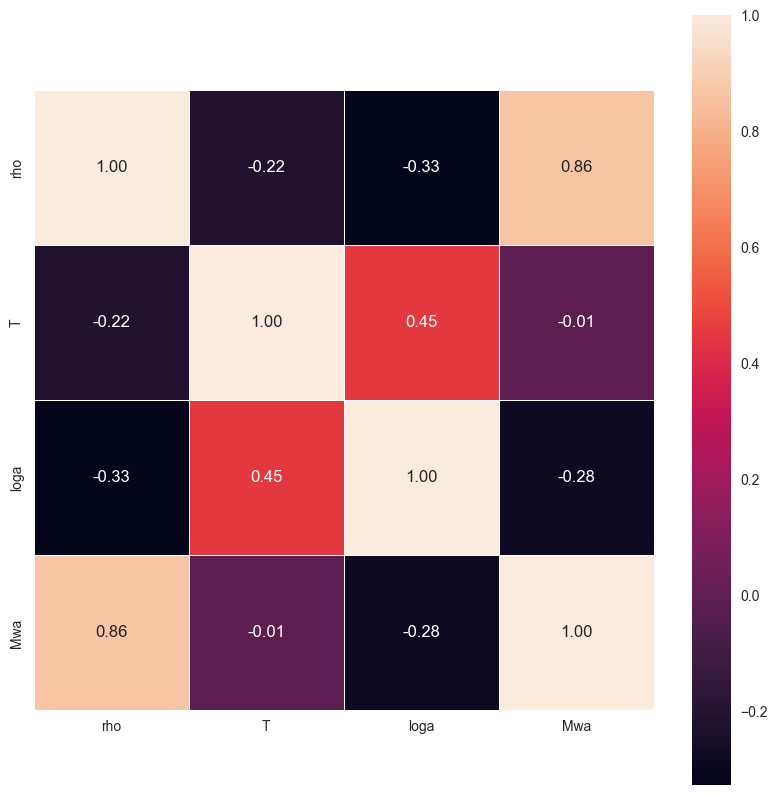

In [13]:
corr = X.corr()
fig1 = plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", 
            square=True, linewidths=.5) 
#heatmap για την συσχέτιση μεταξύ των παραμέτρων και του συντελεστή
plt.show()

<h3 style="color:#15847f; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> A. Random Forest Regressor </i> </h3>

In [16]:
#ορισμός σφαλμάτων και ο υπολλογισμός τους σε ακρίβεια 3 δεκαδικών
def mymetrics(y_true, y_pred, name="Model"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"R²:  {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    return r2, mae, mse


X1 (ρ, T) Results:
R²:  0.889
MAE: 83.371
MSE: 16445.199

X2 (ρ, T, loga) Results:
R²:  0.897
MAE: 82.343
MSE: 15288.260

X3 (ρ, T, loga, Mwa) Results:
R²:  0.935
MAE: 65.792
MSE: 9545.264


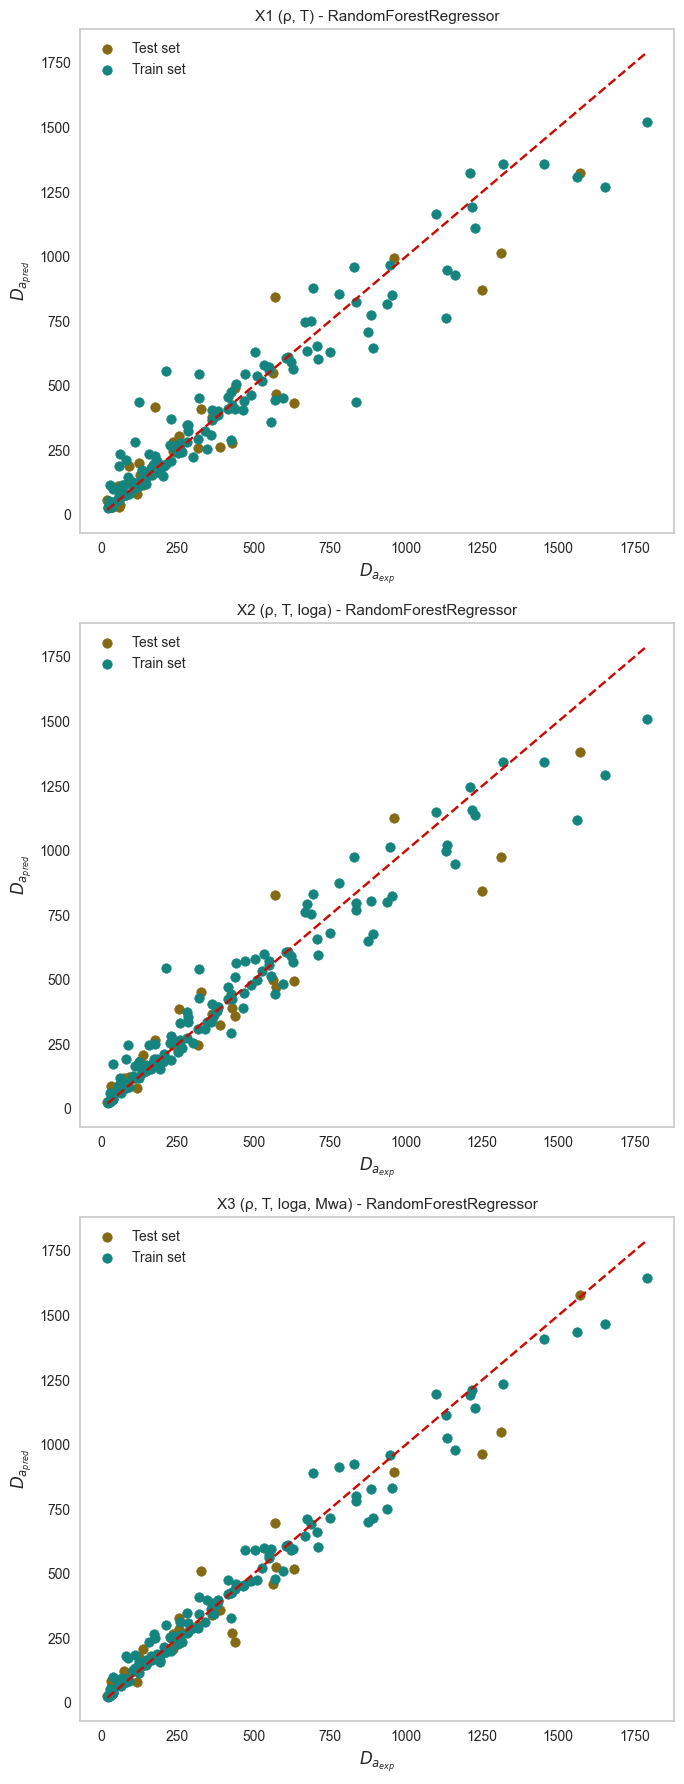

In [18]:
def train_model_and_plot(X, y, ax, name="Model"):
    # Χωρισμός σε train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Μοντέλο
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # Προβλέψεις
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Μετρικές
    mymetrics(y_test, y_pred_test, name)

    # Πλοτ
    ax.scatter(y_test, y_pred_test, c='#846a15', label='Test set')
    ax.scatter(y_train, y_pred_train, c='#15847f', label='Train set')
    p1 = max(max(y_train), max(y_test))
    p2 = min(min(y_train), min(y_test))
    ax.plot([p2, p1], [p2, p1], 'r--')
    ax.set_xlabel(r'$D_{a_{exp}}$', fontsize=12)
    ax.set_ylabel(r'$D_{a_{pred}}$', fontsize=12)
    ax.set_title(f"{name} - {str(model).split('(')[0]}", fontsize=11)
    ax.legend()
    ax.grid()

# Δημιουργία 3 γραφημάτων το ένα κάτω από το άλλο
fig, axs = plt.subplots(3, 1, figsize=(7, 18))

# Λίστα με τα X και τα ονόματά τους
X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

# Εκπαίδευση και σχεδίαση για κάθε σύνολο εισόδου
for i in range(3):
    train_model_and_plot(X_list[i], y, axs[i], names[i])

plt.tight_layout()
plt.show()

C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have

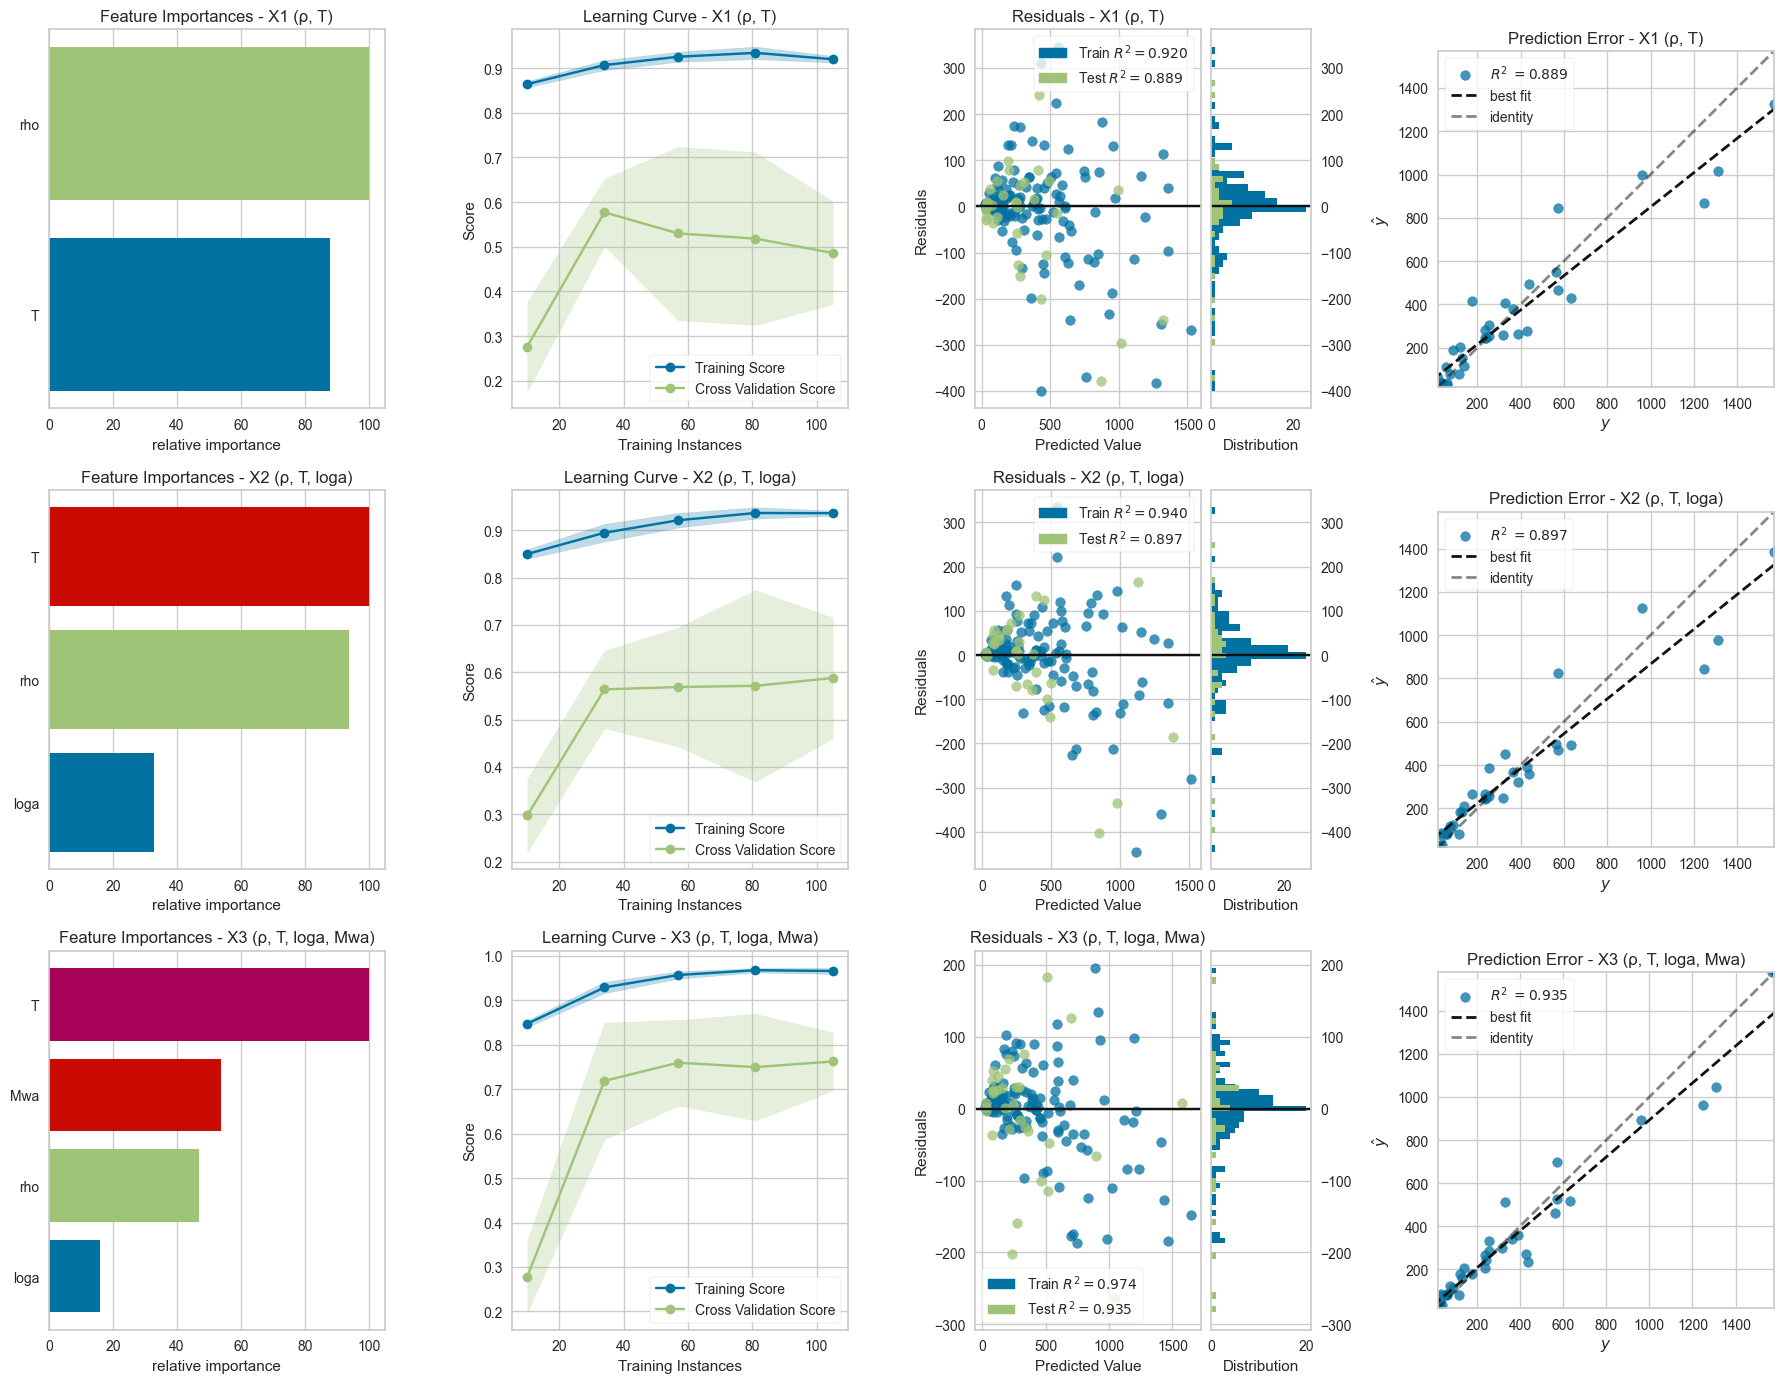

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.features import FeatureImportances

fig, axs = plt.subplots(3, 4, figsize=(18, 14))  # 3 σειρές, 4 γραφήματα ανά σετ

X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

for i in range(3):
    X = X_list[i]
    name = names[i]

    # Χωρισμός δεδομένων
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # Νέο μοντέλο για κάθε σετ
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # Feature Importances
    viz = FeatureImportances(model, ax=axs[i][0])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][0].set_title(f"Feature Importances - {name}")

    # Learning Curve
    viz = LearningCurve(model, scoring='r2', cv=5, ax=axs[i][1])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][1].set_title(f"Learning Curve - {name}")

    # Residuals Plot
    viz = ResidualsPlot(model, ax=axs[i][2])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][2].set_title(f"Residuals - {name}")

    # Prediction Error
    viz = PredictionError(model, ax=axs[i][3])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][3].set_title(f"Prediction Error - {name}")

plt.tight_layout()
plt.show()

<h3 style="color:#781889; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> B. Extra Trees  </i> </h3>


X1 (ρ, T) Results:
R²:  0.770
MAE: 119.607
MSE: 33968.374

X2 (ρ, T, loga) Results:
R²:  0.873
MAE: 80.878
MSE: 18864.346

X3 (ρ, T, loga, Mwa) Results:
R²:  0.947
MAE: 64.109
MSE: 7851.325


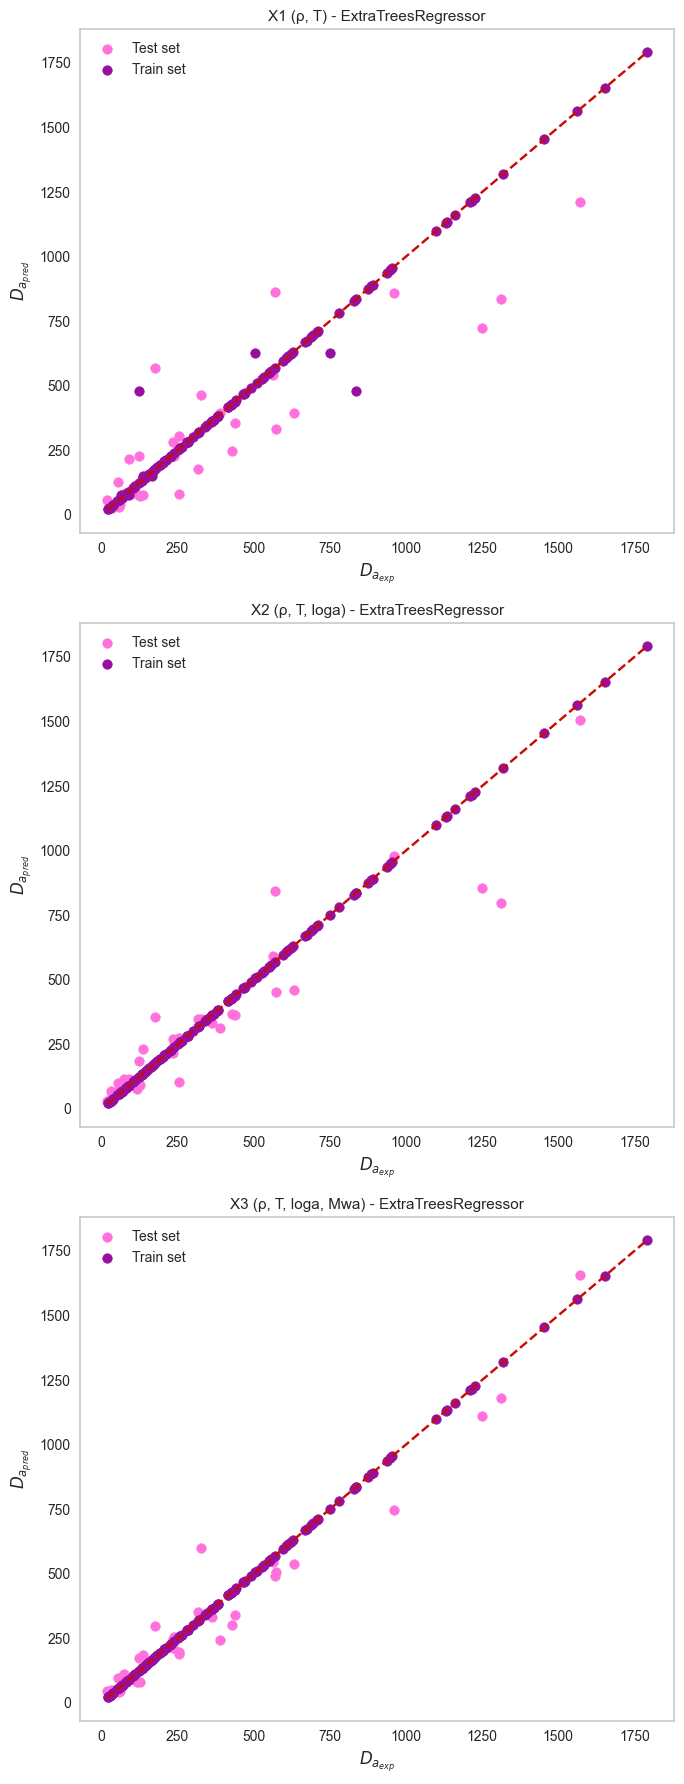

In [23]:
def train_model_and_plot(X, y, ax, name="Model"):
    # Χωρισμός σε train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Μοντέλο
    model = ExtraTreesRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # Προβλέψεις
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Μετρικές
    mymetrics(y_test, y_pred_test, name)

    # Πλοτ
    ax.scatter(y_test, y_pred_test, c='#ff71dc', label='Test set')
    ax.scatter(y_train, y_pred_train, c='#970f9e', label='Train set')
    p1 = max(max(y_train), max(y_test))
    p2 = min(min(y_train), min(y_test))
    ax.plot([p2, p1], [p2, p1], 'r--')
    ax.set_xlabel(r'$D_{a_{exp}}$', fontsize=12)
    ax.set_ylabel(r'$D_{a_{pred}}$', fontsize=12)
    ax.set_title(f"{name} - {str(model).split('(')[0]}", fontsize=11)
    ax.legend()
    ax.grid()

# Δημιουργία 3 γραφημάτων το ένα κάτω από το άλλο
fig, axs = plt.subplots(3, 1, figsize=(7, 18))

# Λίστα με τα X και τα ονόματά τους
X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

# Εκπαίδευση και σχεδίαση για κάθε σύνολο εισόδου
for i in range(3):
    train_model_and_plot(X_list[i], y, axs[i], names[i])

plt.tight_layout()
plt.show()

C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid f

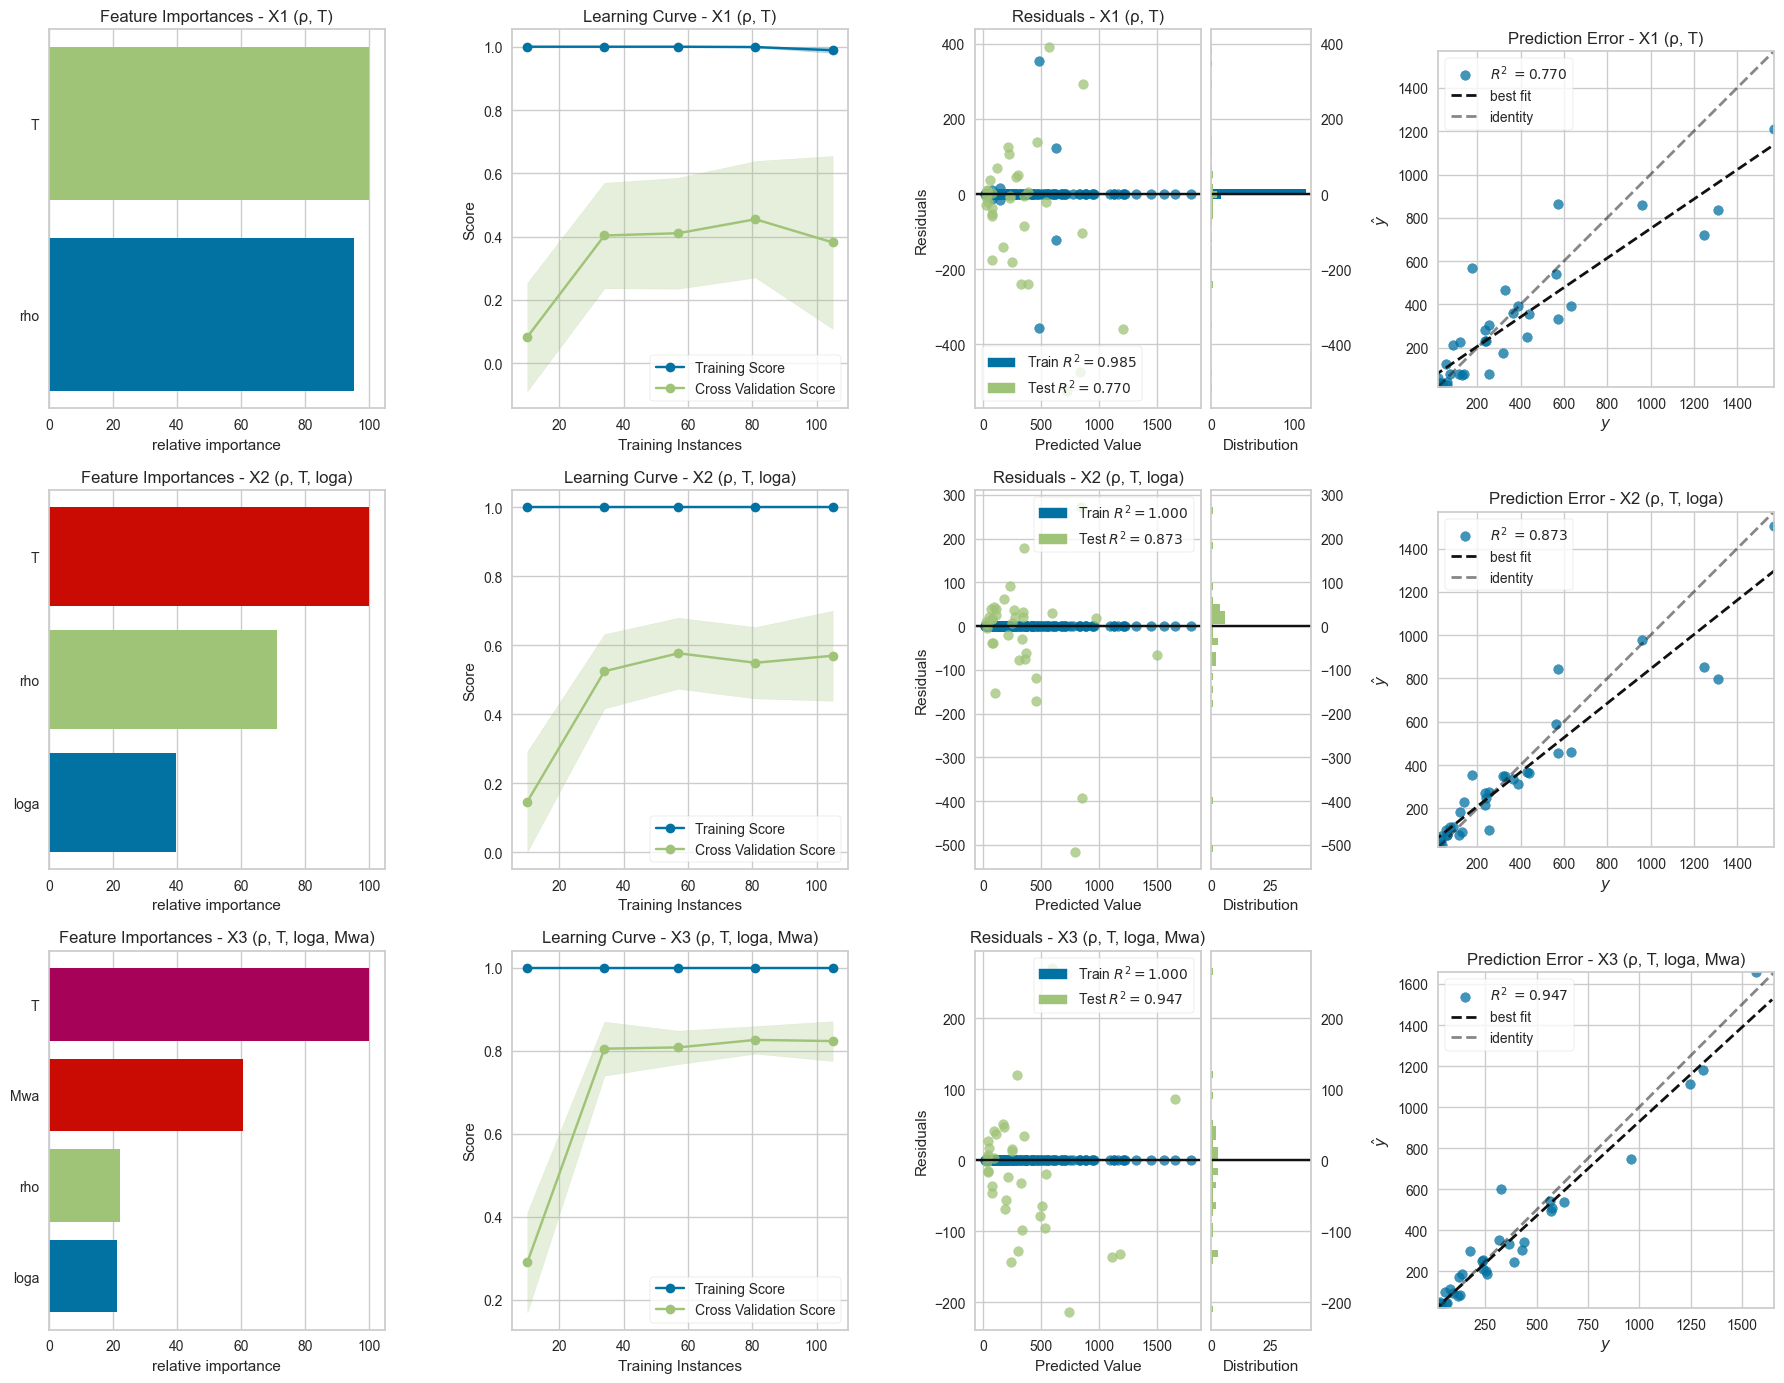

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.features import FeatureImportances

fig, axs = plt.subplots(3, 4, figsize=(18, 14))  # 3 σειρές, 4 γραφήματα ανά σετ

X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

for i in range(3):
    X = X_list[i]
    name = names[i]

    # Χωρισμός δεδομένων
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # Νέο μοντέλο για κάθε σετ
    model = ExtraTreesRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    # Feature Importances
    viz = FeatureImportances(model, ax=axs[i][0])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][0].set_title(f"Feature Importances - {name}")

    # Learning Curve
    viz = LearningCurve(model, scoring='r2', cv=5, ax=axs[i][1])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][1].set_title(f"Learning Curve - {name}")

    # Residuals Plot
    viz = ResidualsPlot(model, ax=axs[i][2])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][2].set_title(f"Residuals - {name}")

    # Prediction Error
    viz = PredictionError(model, ax=axs[i][3])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][3].set_title(f"Prediction Error - {name}")

plt.tight_layout()
plt.show()

<h3 style="color:#9e0f0f; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> C. Gradient Boost </i> </h3>


X1 (ρ, T) Results:
R²:  0.731
MAE: 122.704
MSE: 39775.726

X2 (ρ, T, loga) Results:
R²:  0.789
MAE: 108.956
MSE: 31289.672

X3 (ρ, T, loga, Mwa) Results:
R²:  0.947
MAE: 60.007
MSE: 7787.731


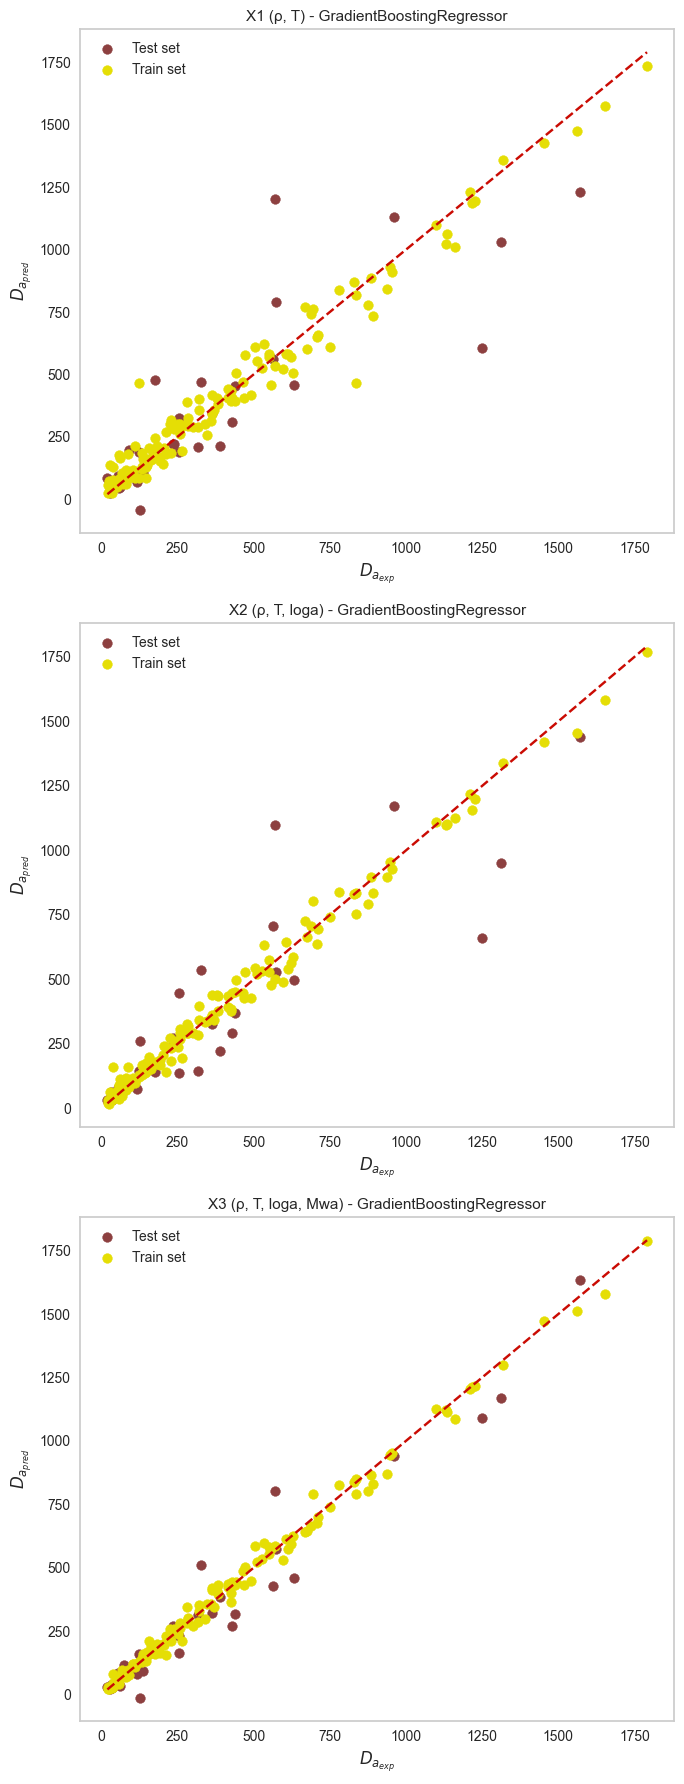

In [30]:
def train_model_and_plot(X, y, ax, name="Model"):
    # Χωρισμός σε train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Μοντέλο
    model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Προβλέψεις
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Μετρικές
    mymetrics(y_test, y_pred_test, name)

    # Πλοτ
    ax.scatter(y_test, y_pred_test, c='#8d4040', label='Test set')
    ax.scatter(y_train, y_pred_train, c='#e5de05', label='Train set')
    p1 = max(max(y_train), max(y_test))
    p2 = min(min(y_train), min(y_test))
    ax.plot([p2, p1], [p2, p1], 'r--')
    ax.set_xlabel(r'$D_{a_{exp}}$', fontsize=12)
    ax.set_ylabel(r'$D_{a_{pred}}$', fontsize=12)
    ax.set_title(f"{name} - {str(model).split('(')[0]}", fontsize=11)
    ax.legend()
    ax.grid()

# Δημιουργία 3 γραφημάτων το ένα κάτω από το άλλο
fig, axs = plt.subplots(3, 1, figsize=(7, 18))

# Λίστα με τα X και τα ονόματά τους
X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

# Εκπαίδευση και σχεδίαση για κάθε σύνολο εισόδου
for i in range(3):
    train_model_and_plot(X_list[i], y, axs[i], names[i])

plt.tight_layout()
plt.show()

C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

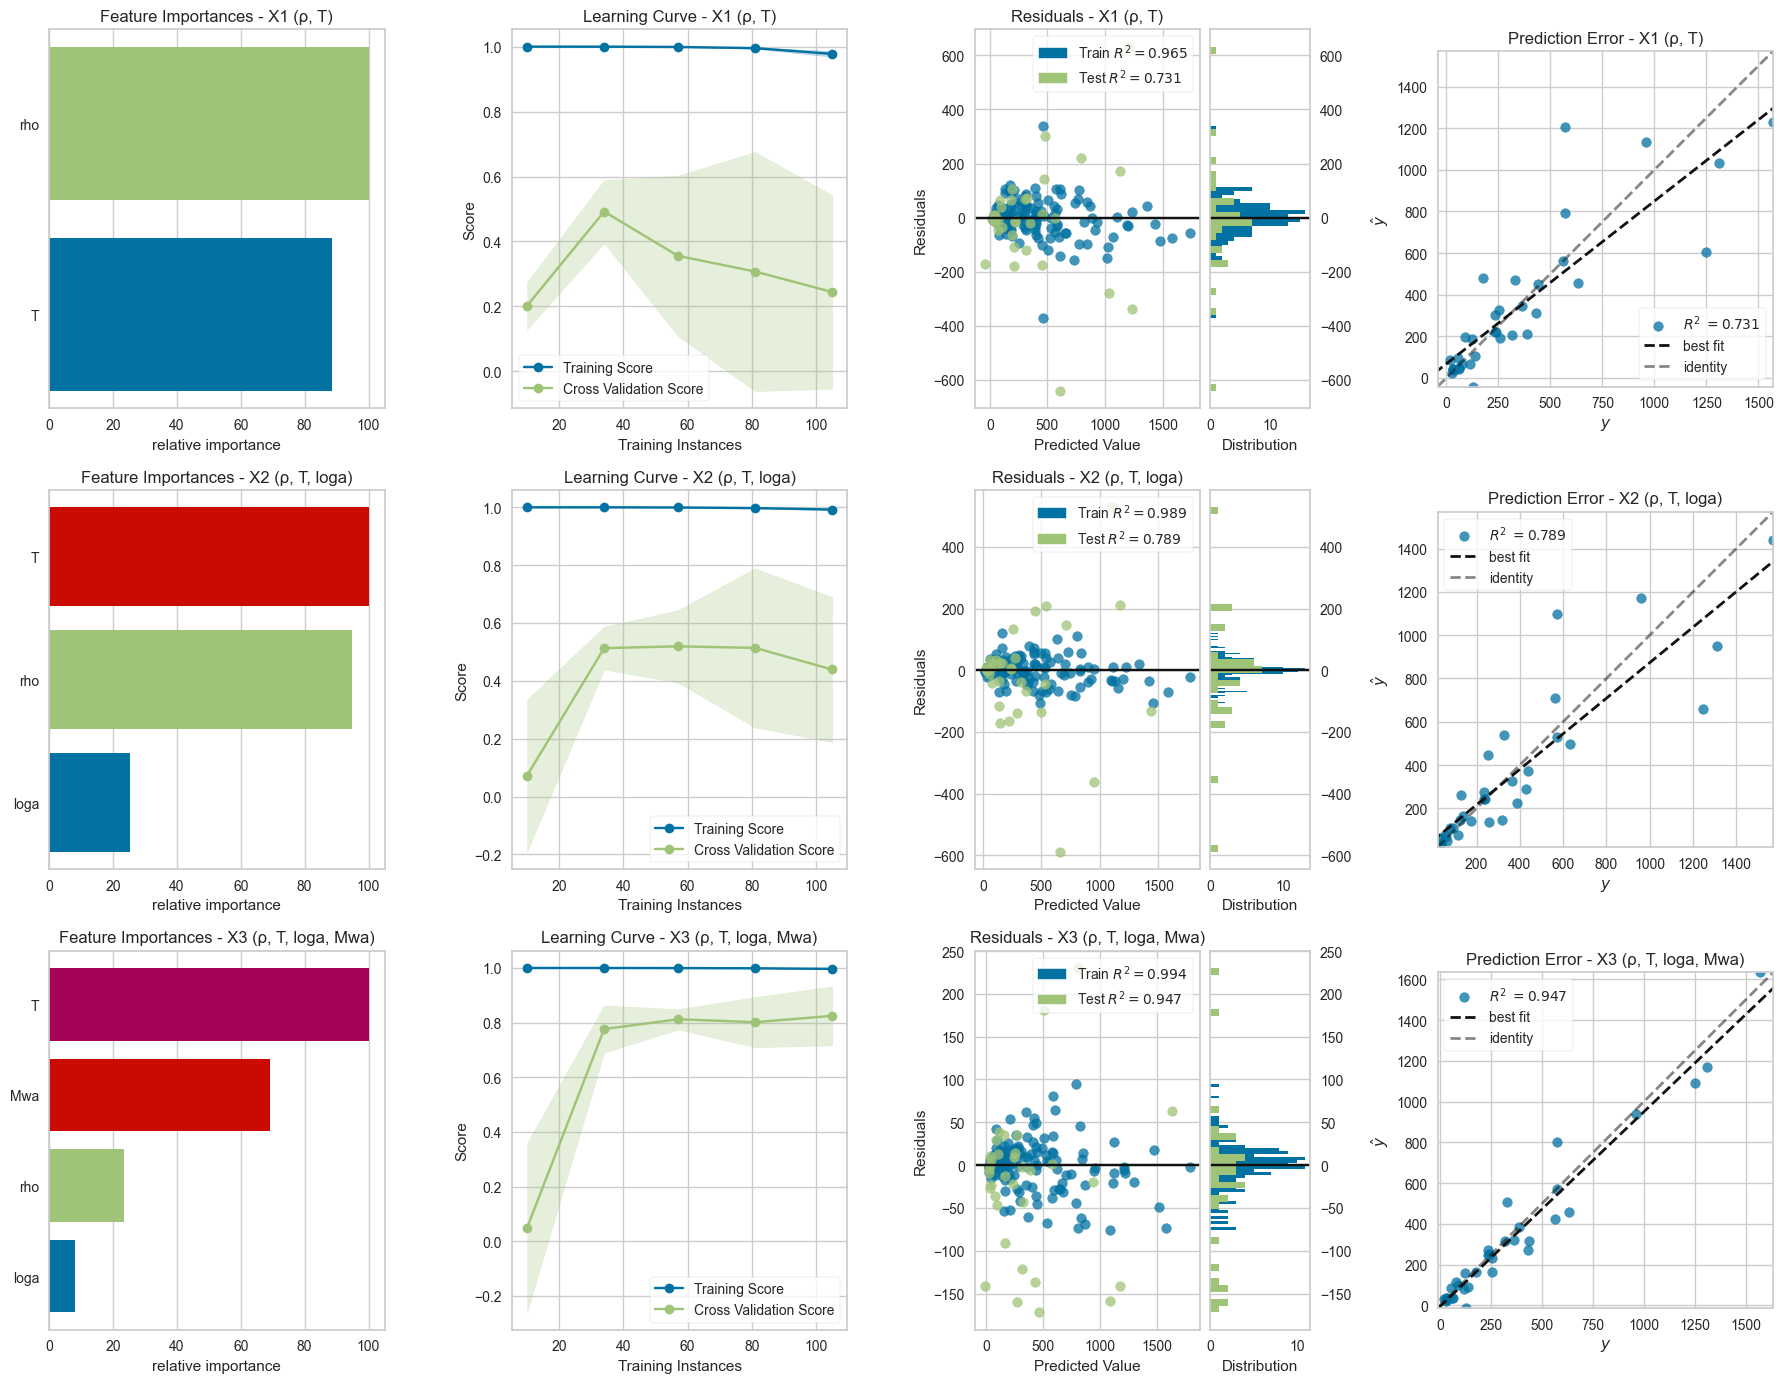

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.features import FeatureImportances

fig, axs = plt.subplots(3, 4, figsize=(18, 14))  # 3 σειρές, 4 γραφήματα ανά σετ

X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

for i in range(3):
    X = X_list[i]
    name = names[i]

    # Χωρισμός δεδομένων
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # Νέο μοντέλο για κάθε σετ
    model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
    model.fit(X_train, y_train)

    # Feature Importances
    viz = FeatureImportances(model, ax=axs[i][0])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][0].set_title(f"Feature Importances - {name}")

    # Learning Curve
    viz = LearningCurve(model, scoring='r2', cv=5, ax=axs[i][1])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][1].set_title(f"Learning Curve - {name}")

    # Residuals Plot
    viz = ResidualsPlot(model, ax=axs[i][2])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][2].set_title(f"Residuals - {name}")

    # Prediction Error
    viz = PredictionError(model, ax=axs[i][3])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][3].set_title(f"Prediction Error - {name}")

plt.tight_layout()
plt.show()

<h3 style="color:#9e0f0f; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> Εξήγηση παραμέτρων των μοντέλων </i> </h3>
<span style="color:#000000; font-family:Times New Roman; font-size:15px; text-align: justify;"> 
<ol style="text-align: justify;"> 
    <li> <b>n_estimators:</b> Ο αριθμός των boosting stages (ή αλλιώς ο αριθμός των μικρών trees που θα φτιαχτούν διαδοχικά).
        <ol type="a">
           <li> Πολλά trees → μεγαλύτερη πιθανότητα να γίνει overfitting, </li>
           <li> Ενώ λίγα trees → underfitting </li> </ol>
    <li> <b>learning_rate:</b> Πόσο συμβάλλει το κάθε tree στο τελικό αποτέλεσμα, δηλαδή "πόσο δυνατά" μαθαίνει το μοντέλο από κάθε λάθος.
    <ol type="a">
           <li> Μεγάλο learning_rate (π.χ. 0.3 - 1.0) → αυξάνει τον κίνδυνο overfitting, </li>
           <li> Ενώ μικρό learning_rate (π.χ. 0.01 - 0.1) → πιο ασφαλές απέναντι στο overfitting, αλλά απαιτεί περισσότερα trees (n_estimators ↑).</li> </ol></li>
    <li> <b>max_depth:</b> Το μέγιστο βάθος κάθε δέντρου, δηλαδή όσο πιο βαθύ είναι ένα δέντρο, τόσο πιο "λεπτομερείς" είναι οι αποφάσεις του.
     <ol type="a">
           <li> max_depth ↑ → το δέντρο μπορεί να γίνει πολύ περίπλοκο → overfitting, </li>
           <li> Ενώ max_depth ↓ → αποφεύγει το overfitting, αλλά μπορεί να υπάρξει και underfitting.</li> </ol></li></li>
    <li> <b>random_state:</b> Είναι ο "σπόρος" για τον μηχανισμό της τυχαίοτητας που χρησιμοποιεί το μοντέλο. Οπότε επιλέγοντας έναν ακέραιο αριθμό (πχ 42), η τυχαιότητα γίνεται ελεγχόμενη, το μοντέλο θα κάνει πάντα τις ίδιες επιλογές και θα αναπαράγει ακριβώς το ίδιο αποτέλεσμα. </li> 
       
</span>

<h3 style="color:#189157; text-align:center; font-family:Times New Roman; font-size:22px;"> <i> D. Multi-layer Perceptron Regressor (MLPRegressor) </i> </h3>


X1 (ρ, T) Results:
R²:  0.160
MAE: 266.579
MSE: 124362.088

X2 (ρ, T, loga) Results:
R²:  0.156
MAE: 272.407
MSE: 124875.829

X3 (ρ, T, loga, Mwa) Results:
R²:  0.752
MAE: 128.496
MSE: 36695.815


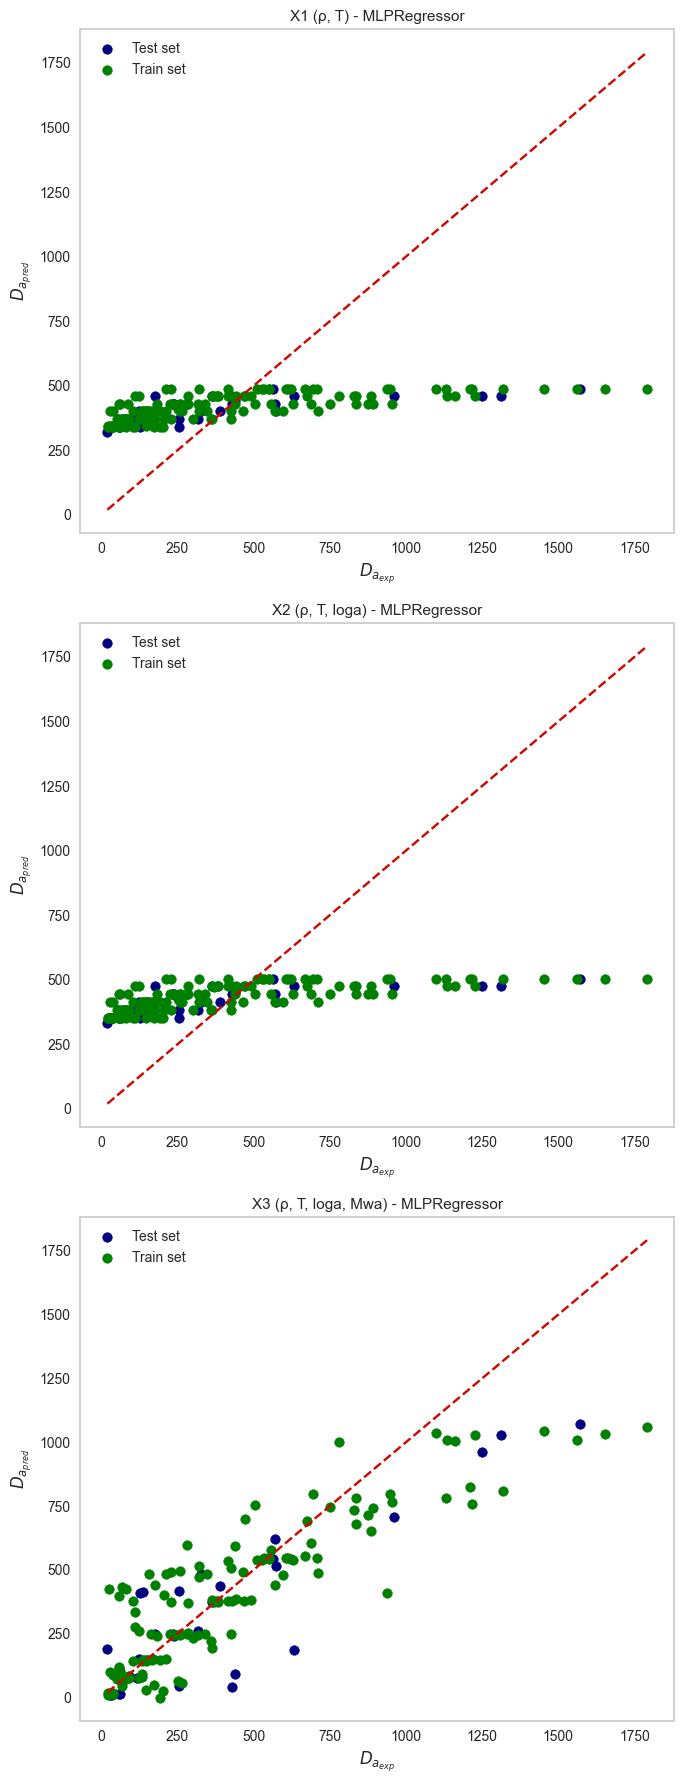

In [36]:
def train_model_and_plot(X, y, ax, name="Model"):
    # Χωρισμός σε train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

    # Μοντέλο
    model = MLPRegressor(hidden_layer_sizes=(200,200,200), solver = 'adam', learning_rate_init=0.001, max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    # Προβλέψεις
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Μετρικές
    mymetrics(y_test, y_pred_test, name)

    # Πλοτ
    ax.scatter(y_test, y_pred_test, c='navy', label='Test set')
    ax.scatter(y_train, y_pred_train, c='green', label='Train set')
    p1 = max(max(y_train), max(y_test))
    p2 = min(min(y_train), min(y_test))
    ax.plot([p2, p1], [p2, p1], 'r--')
    ax.set_xlabel(r'$D_{a_{exp}}$', fontsize=12)
    ax.set_ylabel(r'$D_{a_{pred}}$', fontsize=12)
    ax.set_title(f"{name} - {str(model).split('(')[0]}", fontsize=11)
    ax.legend()
    ax.grid()

# Δημιουργία 3 γραφημάτων το ένα κάτω από το άλλο
fig, axs = plt.subplots(3, 1, figsize=(7, 18))

# Λίστα με τα X και τα ονόματά τους
X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

# Εκπαίδευση και σχεδίαση για κάθε σύνολο εισόδου
for i in range(3):
    train_model_and_plot(X_list[i], y, axs[i], names[i])

plt.tight_layout()
plt.show()

C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\fragk\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegress

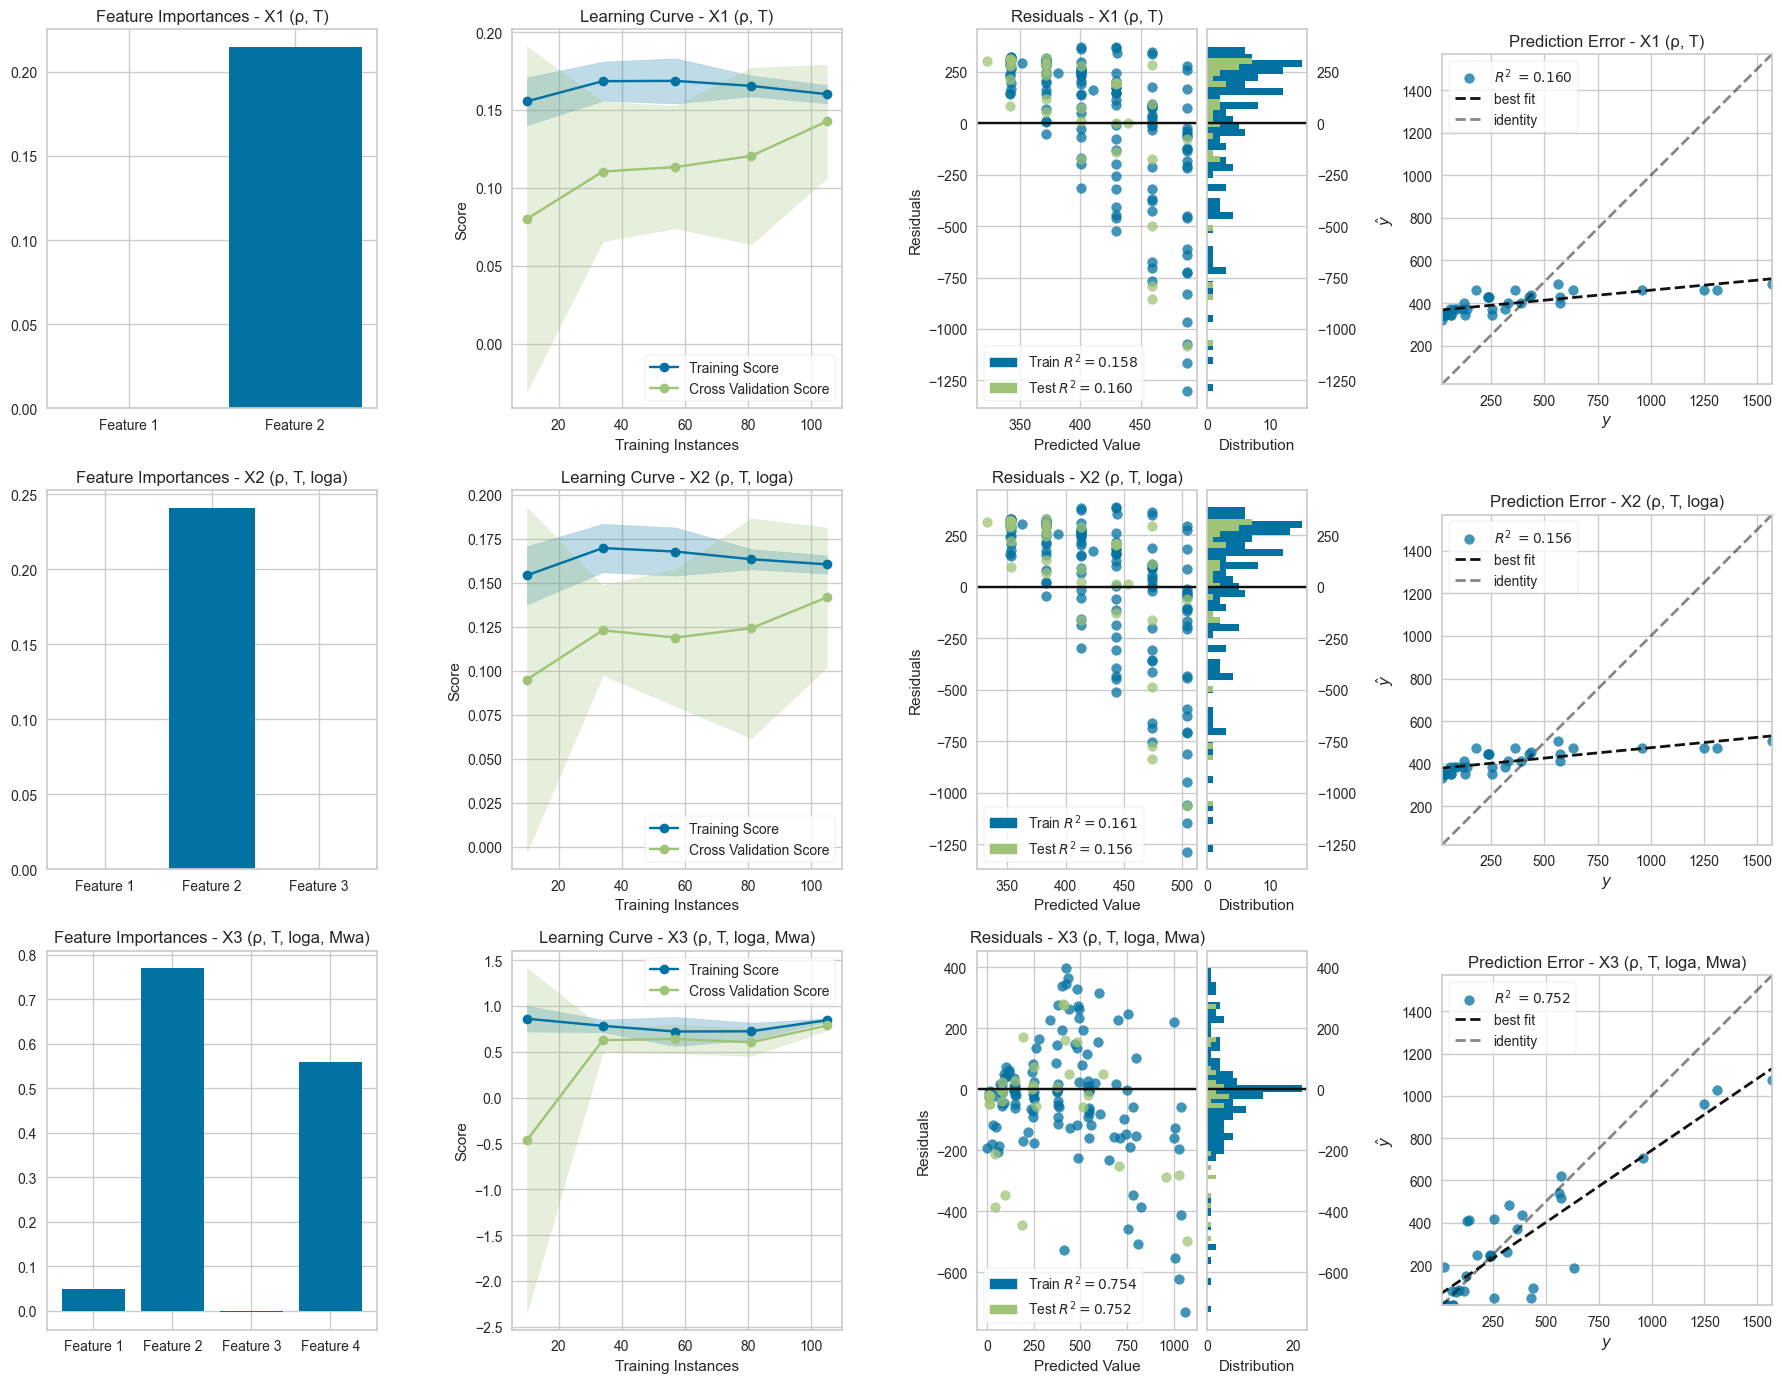

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot, PredictionError
import matplotlib.pyplot as plt

# Σειρές δεδομένων
X_list = [X1, X2, X3]
names = ["X1 (ρ, T)", "X2 (ρ, T, loga)", "X3 (ρ, T, loga, Mwa)"]

fig, axs = plt.subplots(3, 4, figsize=(18, 14))  # 3 σειρές, 4 γραφήματα ανά σετ

for i in range(3):
    X = X_list[i]
    name = names[i]

    # Χωρισμός δεδομένων
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

    # Μοντέλο MLPRegressor για κάθε σετ
    model = MLPRegressor(hidden_layer_sizes=(200,200,200), solver='adam', learning_rate_init=0.001, max_iter=2000, random_state=42)
    model.fit(X_train, y_train)

    # Feature Importances με Permutation Importance
    perm_importance = permutation_importance(model, X_test, y_test)
    feature_importance = perm_importance.importances_mean

    # Feature Importances
    axs[i][0].bar(range(len(feature_importance)), feature_importance)
    axs[i][0].set_title(f"Feature Importances - {name}")
    axs[i][0].set_xticks(range(len(feature_importance)))
    axs[i][0].set_xticklabels([f"Feature {j+1}" for j in range(len(feature_importance))])

    # Learning Curve
    viz = LearningCurve(model, scoring='r2', cv=5, ax=axs[i][1])
    viz.fit(X_train, y_train)
    viz.finalize()
    axs[i][1].set_title(f"Learning Curve - {name}")

    # Residuals Plot
    viz = ResidualsPlot(model, ax=axs[i][2])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][2].set_title(f"Residuals - {name}")

    # Prediction Error
    viz = PredictionError(model, ax=axs[i][3])
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.finalize()
    axs[i][3].set_title(f"Prediction Error - {name}")

# Ρύθμιση layout
plt.tight_layout()
plt.show()

<h3 style="color:#185d91; text-align:center; font-family:Times New Roman; font-size:22px;"> <u> <i> Εξήγηση MLPRegressor</i></u></h3>
<span style="color:#000000; font-family:Times New Roman; font-size:15px; text-align: justify;"> 
    Η ιδιαίτερη διαφορά μεταξύ των τριών πρώτων μεθόδων με την τελευταία των νευρωνικών δικτύων είναι ότι η MLPRegressor δεν υποστηρίζει άμεσα τη μέθοδο για την εμφάνιση σημαντικότητας χαρακτηριστικών, οπότε χρησιμοποιηθήκε η Permutation Importance από το sklearn.inspection για να υπολογίσουμε την σημασία των χαρακτηριστικών. Αυτός ο υπολογισμός εκτιμά πόσο η απόδοση του μοντέλου επηρεάζεται από την αλλαγή κάθε χαρακτηριστικού. Τα υπόλοιπα γραφήματα λειτουργούν κανονικά.
    
    
<span style="color:#000000; font-family:Times New Roman; font-size:18px; text-align: justify;"> <u> Εξήγηση παραμέτρων της MLPRegressor </u> </span>
<ol style="text-align: justify;"> 
    <li> <b>hidden_layer_sizes:</b> Ορίζει τον αριθμό και το μέγεθος των κρυφών στρωμάτων στο νευρωνικό δίκτυο. Πχ (200,200,200) σημαίνει 200 κρυφά στρώματα με το καθένα να έχει 200 νευρώνες.</li>
    <li> <b>solver:</b> Ο αλγόριθμος βελτιστοποίησης που χρησιμοποιείται για την εκπαίδευση του μοντέλου.</li>
    <li> <b>max_iter:</b> Ο αριθμός των μέγιστων επαναλήψεων για την εκπαίδευση.</li>
    <li> <b>random_state:</b> Είναι ο "σπόρος" για τον μηχανισμό της τυχαίοτητας που χρησιμοποιεί το μοντέλο. Οπότε επιλέγοντας έναν ακέραιο αριθμό (πχ 42), η τυχαιότητα γίνεται ελεγχόμενη, το μοντέλο θα κάνει πάντα τις ίδιες επιλογές και θα αναπαράγει ακριβώς το ίδιο αποτέλεσμα. </li> 
       
</span>

<h3 style="color:#189157; text-align:center; font-family:Times New Roman; font-size:22px;"> <b> <u> <i> Συμπεράσματα </i> </u> </b> </h3>

<span style="color:#000000; font-family:Times New Roman; font-size:15px; text-align: justify;"> 
<ol style="text-align: justify;"> 
    <li> <b>Για Random Forest Regressor:</b> Παρατηρούμε πως τα αποτελέσματα αυτού του μοντέλου δείχνουν πως για κάθε δεδομένα εισόδου έχουν μια πολύ καλή προσαρμογή, καθώς τα \(R^2\) κυμαίνονται από 0,88 έως 0,93. Είναι ξεκάθαρο πως το μοντέλο αποδίδει πολύ καλύτερα με όλο το σετ δεδομένων.
    <ol type="a"> 
           <li> Στα <i>Feature Importances</i> οι πιο μεγάλες μπάρες των χαρακτηριστικών υποδηλώνουν ότι είναι σημαντικές για την πρόβλεψη. Ωστόσο, όσο πιο μικρές ή σχεδόν μηδενικές μπάρες, σημαίνει πως το μοντέλο μπορεί να προβλέψει το ίδιο καλά χωρίς αυτά τα μεγέθη. Στο σετ Χ1 παρατηρούμε πως η πυκνότητα είναι πιο σημαντική, επείτα στο σετ Χ2 είναι η θερμοκρασία και τέλος σε όλο το σετ δεδομένων είναι η θερμοκρασία και το μοριακό βάρος. </li>
            <li> Στα <i>Learning Curve</i> μπορούμε να καταλάβουμε την μεταβολλή της απόδοσης του μοντέλου καθώς αυξάνεται το μέγεθος του training set. Αν οι δύο καμπύλες συγκλίνουν και είναι ψηλά, τότε το μοντέλο μαθαίνει καλά και γενικεύει. Αν, όμως, υπάρχει μεγάλο gap μεταξύ του training και validation, τότε είτε κάνει οverfitting (training ψηλά, validation χαμηλά), είτε κάνει underfitting (training και validation χαμηλά). Στην προκειμένη περίπτωση παρατηρούμε πως στα σετ Χ1 και Χ2 έχουν μεγάλο gap μετσξύ τους που σημαίνει πως έχουμε overfitting, ενώ στο σετ Χ3 τείνουν να συγκλίνουν περισσότερο, με αποτέλεσμα να έχουμε καλύτερη απόδοση. </li>
            <li> Στα <i>Residuals Plots</i> έχουμε στον οριζόντιο άξονα τις πραγματικές τιμές και στον κατακόρυφο έχουμε τα σφάλματα πρόβλεψης. Αν τα δεδομένα είναι ομοιόμορφα σκορπισμένα γύρω από το 0 (σαν γραφική Gauss), τότε το μοντέλο δεν κάνει συστηματικά λάθη αλλά προβλέπει καλά σε όλο το εύρος των δεδομένων. Αν, όμως, είναι συγκεντρωμένα προς τα πάνω ή προς τα κάτω, τότε είναι υπόδειξη συστηματικού σφάλματος. Στην συγκεκριμένη περίπτωση παρατηρούμε μια ομοιόμορφη κατανομή, με αποτέλεσμα να μην έχουμε σημαντικά λάθη. </li>
           <li> Στα <i>Prediction Error Plot</i> έχουμε στον x-άξονα τις πραγματικές τιμές και στον y-άξονα προβλέψεις του μοντέλου ενώ η διαγώνια γραμμή είναι η ιδανική γραμμή όπου \( y_{pred} = y_{true}\). Όσο πιο κοντά βρίσκονται τα σημεά στην διαγώνια γραμμή, τόσο καλύτερες είναι οι προβλέψεις. Αν τα σημεία είναι πιο σκορπισμένα ή συγκεντρώνονται σε περιοχές μακριά από την διαγώνιο, τότε το μοντέλο κάνει συστηματικά λάθη σε κάποιες περιοχές. Στο συγκεκριμένο μοντέλο παρατηρούμε πως είναι αρκετά κοντά στην διαγώνια γραμμή, οπότε έχουμε ικανοποιητικές προβλέψεις. </li>
    Σε γενικές γραμμές αυτό το μοντέλο λειτουργεί ικανοποιητικά. </li> 
    <li> <b>Για Extra Trees Regressor:</b>Παρατηρούμε πως τα αποτελέσματα αυτού του μοντέλου δείχνουν πως για κάθε δεδομένα εισόδου έχουν μια καλή προσαρμογή, καθώς τα \(R^2\) κυμαίνονται από 0,77 έως 0,95, με το overfitting να ελαχιστοποιείται. Είναι ξεκάθαρο πως το μοντέλο αποδίδει πολύ καλύτερα με όλο το σετ δεδομένων καθώς υπάρχει μια μικρή βελτίωση από το Random Forest Regressor.</li>
         <ol type="a"> 
           <li> Στα <i>Feature Importances</i> παρατηρούμε πως σε όλα τα σετ των δεδομένων η θερμοκρασία παραμένει το πιο σημαντικό μέγεθος για τη πρόβλεψη, επακολουθώντας η πυκνότητα και το μοριακό βάρος. </li>
            <li> Στα <i>Learning Curve</i> παρατηρούμε πως στις δυο πρώτες περιπτώσεις υπάρχει ένα μεγάλο gap ενώ στην περίπτωση με όλα τα δεδομένα οι δύο καμπύλες τείνουν να συγκλίνουν, μειώνοντας σημαντικά το gap μεταξύ τους, έχοντας έτσι πολύ καλύτερη απόδοση.</li>
            <li> Στα <i>Residuals Plots</i> παρατηρούμε πως σχεδόν όλες οι τιμές είναι γύρω από το 0 χωρίς απότομες αυξομειώσεις, οπότε το μοντέλο δεν κάνει συστηματικά λάθη και προβλέπει εξαιρετικά σε όλο το εύρος των δεδομένων. </li>
           <li> Στα <i>Prediction Error Plot</i> παρατηρούμε πως τα δεδομένα βρίσκονται αρκετά κοντά στην ιδανική γραμμή, οπότε καταλαβαίνουμε πως έχουμε πολύ καλές προβλέψεις. </li> </ol>
        Συγκρίνοντας τις δύο πρώτες μεθόδους, παρατηρούμε πως η Extra Tress Regressor είναι πιο αποτελεσματική, ειδικά στο σετ με όλα τα δεδομένα της εργασίας.
    <li> <b>Για Gradient Boost Regressor:</b>Παρατηρούμε πως τα αποτελέσματα αυτού του μοντέλου δείχνουν πως για κάθε δεδομένα εισόδου έχουν μια μέτρια προς καλή προσαρμογή, καθώς τα \(R^2\) κυμαίνονται από 0,73 έως 0,95, με το overfitting να ελαχιστοποιείται. Είναι φανερό πως είναι ελάχιστα καλύτερο από τις 2 πρώτες μεθόδους.</li>
        <ol type="a"> 
           <li> Στα <i>Feature Importances</i> παρατηρούμε πως στην αρχή ήταν σημαντική η πυκνότητα για το μοντέλο, αλλά στα υπόλοιπα σετ δεδομένων είναι η θερμοκρασία με την πυκνότητα και το μοριακός βάρος στην δεύτερη και τρίτη θέση. </li>
            <li> Στα <i>Learning Curve</i> παρατηρούμε πως στις δυο πρώτες περιπτώσεις υπάρχει ένα μεγάλο gap ενώ στην περίπτωση με όλα τα δεδομένα οι δύο καμπύλες τείνουν να συγκλίνουν περισσότερο από τις δύο πρώτες μεθόδους, μειώνοντας σημαντικά το gap μεταξύ τους και έχοντας έτσι πολύ καλύτερη απόδοση.</li>
            <li> Στα <i>Residuals Plots</i> παρατηρούμε πως σχεδόν όλες οι τιμές είναι γύρω από το 0, έχοντας μια Gaussian μορφή των δεδομένων, οπότε το μοντέλο δεν κάνει συστηματικά λάθη και προβλέπει αρκετά καλά σε όλο το εύρος των δεδομένων. </li>
           <li> Στα <i>Prediction Error Plot</i> παρατηρούμε πως τα δεδομένα βρίσκονται αρκετά κοντά στην ιδανική γραμμή, οπότε καταλαβαίνουμε πως έχουμε πολύ καλύτερες προβλέψεις από τις πρώτες δύο μεθόδους, ειδικά στην περίπτωση του σετ Χ3. </li> </ol>
    <li> <b>Για MLPRegressor:</b> Παρατηρούμε πως τα αποτελέσματα αυτού του μοντέλου δείχνουν πως δεν έχει κάνει σημαντική βελτίωση στην απόδοση, καθώς τα \(R^2\) για κάθε σύνολο δεδομένων εισόδου είναι πολύ χαμηλά και κυμαίνονται από 0,16 έως 0,75. Ενώ τα MAE και MSE υποδηλώνουν ότι το μοντέλο εξακολουθεί να κάνει αρκετά λάθη στις προβλέψεις του. Αυτό συμβαίνει γιατί τα δεδομένα μπορεί να μην είναι αρκετά για να εκπαιδευτεί σωστά το μοντέλο και να μην δουλεύει για το συγκεκριμένο πρόβλημα. </li>
        <ol type="a"> 
           <li> Στα Feature Importances οι πιο μεγάλες μπάρες των χαρακτηριστικών (feature 1, feature 2, feature 3, feature 4 είναι αντίστοιχα τα μεγέθη πυκνότητα, θερμοκρασία κλπ) υποδηλώνουν ότι είναι σημαντικές για την πρόβλεψη. Η συγκεκριμένη μέθοδο βασίστηκε ιδιαίτερα στην θερμοκρασία.  </li>
            <li> Στα Learning Curve παρατηρούμε πως το gap είναι σχετικά μικρότερο από τις υπόλοιπες μεθόδους, ειδικά και για το σετ Χ3 που οι καμπύλες συμπίπτουν σημαντικά. Οπότε, το μοντέλο μαθαίνει καλά και γενικεύει. </li>
            <li> Στα Residuals Plots παρατηρούμε πως οι τιμές είναι συγκεντρωμένες περισσότερο προς τα πάνω και έτσι καταλαβαίνουμε πως το μοντέλο κάνει συστηματικά λάθη, ειδικά στα σετ Χ1 και Χ2. Ενώ στο σετ Χ3 παρατηρούμε μια πιο ομοιόμρφη κατανομή των δεδομένων γύρω από το 0, οπότε, έχοντας όλα τα δεδομένα, παρατηρούμε πως δεν υπάρχουν τόσα συστηματικά λάθη και μπορεί να προβλέψει πολύ καλύτερα. </li>
           <li> Στα Prediction Error Plot για τα σετ Χ1 και Χ2 παρατηρούμε πως υπάρχει αρκετή απόκλιση των δεδομένων από την ιδανική γραμμή, οπότε οι προβλέψεις να μην γίνονται σωστά. Ενώ στο σετ Χ3 παρατηρούμε πως έχει πιο ικανοποιητική κλίση, υποδηλώνοντας πως το μοντέλο προβλέπει πολύ καλύτερα με όλα τα δεδομένα.</li>
           </ol>
  Έτσι, διαπιστώνουμε πως όταν δεν έχουμε πάρα πολλά δεδομένα, οι πρώτες 3 μεθόδους λειτουργούν πολύ καλύτερα από ότι λειτουργεί η τελευταία. Το Gradient Boosting Regressor και το Extra Trees Regressor μπορούν και λειτουργούν πολύ καλύτερα για το συγκεκριμένο πρόβλημα, καθώς δεν έχει πολύ έντονο overfitting (ειδικά στο Gradient Boosting Regressor), αρκετά υψηλό το \(R^2\) και τα train set δεν είναι πολύ διασκορπισμένα. Όπως αναφέρθηκε και σε κάθε μέθοδο μηχανική μάθησης, τα μοντέλα εκπαιδεύονται καλύτερα και αποδίδουν όταν υπάρχουν πολλά δεδομένα για ανάλυση, για αυτό και έχουμε καλύτερα αποτελέσματα στην λίστα <i> X3</i>, όπου βρίσκονται όλα τα ζητούμενα δεδομένα εισόδου.</li> Τέλος, παρατηρούμε πως το κάθε μοντέλο της μηχανικής μάθησης στηρίχθηκε κυρίως στην θερμοκρασία για να προβλέψει το δεδομένο εξόδου μας, τον συντελεστή διάχυσης, καθώς επηρέαζαν επίσης η πυκνότητα και το μοριακό βάρος.
 


<p style="text-align: right;">Μαρία Μιχαέλα Φράγκου Στόεβα, Τμήμα Φυσικής, Πανεπιστήμιο Θεσσαλίας, 2025</p>


</span>


